## Final Project Submission

Please fill out:
* Student name: Alaska Lam
* Student pace:  part time 
* Scheduled project review date/time: Mon Nov 30, 2020, 5:15pm
* Instructor name: Amber Yandow
* Blog post URL: www.medium.com


In [1]:
#Import Python libraries

import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

from sklearn import preprocessing 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

import csv
from pylab import *



# Importing Data and EDA

In [2]:
#Importing data

file_name = 'churn_original.csv'
df = pd.read_csv(file_name)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Inspecting data, Checking for null/missing values, Inspecting the dataframe types of each column

df.info()

#We have a ton of objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Checking for duplicates, there are none 

df[df.duplicated()]



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [5]:
#Dropping unnecessary columns 


df = df.drop('customerID',1)
df.head(20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
#Applying label encoding for categorical variables with strings as answers, to turn into numerical


df = df.apply(LabelEncoder().fit_transform)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [7]:
#Checking our dataframe types again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

In [8]:
len(df[df['TotalCharges'] == " "])
# check for missing data

/Users/wildalaska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

In [9]:
## Drop missing data
df = df[df['TotalCharges'] != " "]

In [10]:
#Change financial amounts into floats

df['TotalCharges'] = df.TotalCharges.astype(float)
df['MonthlyCharges'] = df.TotalCharges.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [11]:
#Checking our work

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505.0,2505.0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1466.0,1466.0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,157.0,157.0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1400.0,1400.0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,925.0,925.0,1


# Modeling

Our first step in modelling was to create a baseline model, so that we may iterate upon it in order to improve desired metrics. We used a random forest model.

In [12]:
#Define X and Y, and make train test split

X = df.drop('Churn',axis=1).values
y = df['Churn'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)


(4930, 19)
(2113, 19)


In [13]:
#Make first random forest model, and fit it


rf = RandomForestClassifier(n_estimators=100,random_state=50)
rf.fit(X_train, Y_train)


RandomForestClassifier(random_state=50)

In [14]:
#Accuracy score

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))



Accuracy on training set: 0.998
Accuracy on test set: 0.803


This seems overfit. Let's play around with this and try adding in a max depth, before diving deeper.

In [15]:
rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=3)
rf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=3, random_state=50)

In [16]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.799


In [17]:
rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5)
rf.fit(X_train, Y_train)



RandomForestClassifier(max_depth=5, random_state=50)

In [18]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.805


This last model seems to be a good place to start. Let's take a look at our accuracy and F1 score for our test set.

In [19]:
rf_pred = rf.predict(X_test) #predictions 
score = f1_score(rf_pred, Y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, Y_test) #Accuracy 

rf_eval = ['rf', score, rf_acc]
models = pd.DataFrame([rf_eval])
models

#F1 score is not great

,0,1,2
0,rf,0.542636,0.804543


In [20]:

print('Confusion Matrix:')
print(confusion_matrix(Y_test, rf_pred))

Confusion Matrix:
[[1455  130]
 [ 283  245]]


In [21]:
#Looking at our confusion matrix

tn, fp, fn, tp = confusion_matrix(Y_test, rf_pred).ravel()
tn, fp, fn, tp

(1455, 130, 283, 245)

In [22]:
#Classification matrix for more results of our starting model

print('Classification Matrix:')
print(classification_report(Y_test, rf_pred))



Classification Matrix:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1585
           1       0.65      0.46      0.54       528

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



We can see just how imbalanced this is, there are tons of true negatives because there are more negative cases.
Our model is poor across the board for predicting 1 - churn.

In [23]:
#There is a lot of class imbalance here...

df['Churn'].value_counts()



0    5174
1    1869
Name: Churn, dtype: int64

# Solving for Class Imbalance - using SMOTE

We will use SMOTE to create some synthetic data from the minority, to balance the classes. 

In [24]:
#Installing packages to prepare to use SMOTE

#pip install imblearn - left this commented as the kernel re-start was having issues


In [25]:

# Reminder: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [26]:
#Import SMOTE and print new distribution

from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
print(pd.Series(y).value_counts()) 

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 


Original class distribution: 

0    5174
1    1869
dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    3847
0    3847
dtype: int64


In [27]:
#Creating new model using data from SMOTE

rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5)

smotemodel = rf.fit(X_train_resampled, y_train_resampled)
print(smotemodel)




RandomForestClassifier(max_depth=5, random_state=50)


In [28]:

print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, y_test)))



Accuracy on training set: 0.778
Accuracy on test set: 0.789


In [29]:
#Get f1 score and accuracy on test set 

rf_pred = smotemodel.predict(X_test) #predictions 
score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

rf_eval = ['smotemodel', score, rf_acc]
models = pd.DataFrame([rf_eval])
models

,0,1,2
0,smotemodel,0.630846,0.789324


Our F1 score has increased from .54 earlier. Let's take a look at further metrics.

In [30]:
#Classification Matrix

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, rf_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, rf_pred))



----------------------------------------
Accuracy Score:
0.7893242475865985
----------------------------------------
Confusion Matrix:
[[1073  254]
 [ 117  317]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1327
           1       0.56      0.73      0.63       434

    accuracy                           0.79      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.82      0.79      0.80      1761



This model is definitely a decent amount better!

True negatives went down from approx 1400 to approx 1000.

0 scores - precision slightly increased from .88 to .90, recall decreased from .92 to .81, and f1 slightly decreased from .88 to .85.

1 scores - precision decreased from .65 to .54, but recall shot up from .46 to .74, and f1 went up from .54 to .63

Overall accuracy score decreased very slightly from .80 to .79

# Prioritizing Metrics

Now let's decide what this means and what to prioritize in the classification matrix.

Precision - out of all the true positive and false positive (all the people we labelled positive), 
56% were true positives and actually churned, and the other half didn't actually churn but we thought they would churn

Recall - out of all the true positives and false negatives (all actual positive data), we got 74% true positives who actually churned, and 26% we missed - false negatives - they churned and we thought they would stay

Which error is worse? The second one seems worse from conservative standpoint - missing out on customers we could
have kept. it doesn't seem too bad to woo our existing happy customers - maybe they will upgrade to a higher account

Let's optimize for recall - a false negative is more important to reduce. Let's make our churn labelling as liberal as possible.

In [31]:
#Trying a variety of values for min impurity decrease, we can see this only decreases accuracy. 

rf = RandomForestClassifier(n_estimators=100,random_state=50,max_depth=5, min_impurity_decrease=100)

smotemodel = rf.fit(X_train_resampled, y_train_resampled)
print(smotemodel)

print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, y_test)))



RandomForestClassifier(max_depth=5, min_impurity_decrease=100, random_state=50)
Accuracy on training set: 0.728
Accuracy on test set: 0.754


In [32]:
#Try changing estimators

rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5)

smotemodel = rf.fit(X_train_resampled, y_train_resampled)
print(smotemodel)

print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, y_test)))

#accuracy on test went from .763 to .765

rf_pred = smotemodel.predict(X_test) #predictions 
score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

rf_eval = ['smotemodel', score, rf_acc]
models = pd.DataFrame([rf_eval])

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, rf_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, rf_pred))

#barely helpful, it increased recall by .01 for 1


RandomForestClassifier(max_depth=5, n_estimators=200, random_state=50)
Accuracy on training set: 0.777
Accuracy on test set: 0.787
----------------------------------------
Accuracy Score:
0.787052810902896
----------------------------------------
Confusion Matrix:
[[1067  260]
 [ 115  319]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1327
           1       0.55      0.74      0.63       434

    accuracy                           0.79      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.82      0.79      0.80      1761



In [33]:
#Try balancing the weight

rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5, class_weight='balanced')
smotemodel = rf.fit(X_train_resampled, y_train_resampled)

print(smotemodel)
print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, y_test)))

rf_pred = smotemodel.predict(X_test) #predictions 
score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

rf_eval = ['smotemodel', score, rf_acc]
models = pd.DataFrame([rf_eval])

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, rf_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, rf_pred))


#balancing weight - didn't help, not surprising since we already did smote

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=50)
Accuracy on training set: 0.777
Accuracy on test set: 0.787
----------------------------------------
Accuracy Score:
0.787052810902896
----------------------------------------
Confusion Matrix:
[[1067  260]
 [ 115  319]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1327
           1       0.55      0.74      0.63       434

    accuracy                           0.79      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.82      0.79      0.80      1761



In [34]:
#Try experimenting with min sample split

rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5, min_samples_split = 10)
smotemodel = rf.fit(X_train_resampled, y_train_resampled)

print(smotemodel)
print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, y_test)))

rf_pred = smotemodel.predict(X_test) #predictions 
score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

rf_eval = ['smotemodel', score, rf_acc]
models = pd.DataFrame([rf_eval])

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, rf_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, rf_pred))

#This did not help. Let's discard this.

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=200,
                       random_state=50)
Accuracy on training set: 0.777
Accuracy on test set: 0.786
----------------------------------------
Accuracy Score:
0.7859170925610448
----------------------------------------
Confusion Matrix:
[[1064  263]
 [ 114  320]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1327
           1       0.55      0.74      0.63       434

    accuracy                           0.79      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.82      0.79      0.80      1761



In [35]:
#Try adjusting max features

rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5, max_features = 8)
smotemodel = rf.fit(X_train_resampled, y_train_resampled)

print(smotemodel)
print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, y_test)))

rf_pred = smotemodel.predict(X_test) #predictions 
score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

rf_eval = ['smotemodel', score, rf_acc]
models = pd.DataFrame([rf_eval])

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, rf_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, rf_pred))

#playing around with max features didn't help and in some cases decreased by .1


RandomForestClassifier(max_depth=5, max_features=8, n_estimators=200,
                       random_state=50)
Accuracy on training set: 0.780
Accuracy on test set: 0.792
----------------------------------------
Accuracy Score:
0.7921635434412265
----------------------------------------
Confusion Matrix:
[[1077  250]
 [ 116  318]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1327
           1       0.56      0.73      0.63       434

    accuracy                           0.79      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.82      0.79      0.80      1761



In [37]:
#running the cell again to save the new number of estimators as 200 - the last model that helped improve recall

rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5)

smotemodel = rf.fit(X_train_resampled, y_train_resampled)
print(smotemodel)

print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, y_test)))

#accuracy on test went from .763 to .765

rf_pred = smotemodel.predict(X_test) #predictions 
score = f1_score(rf_pred, y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, y_test) #Accuracy 

rf_eval = ['smotemodel', score, rf_acc]
models = pd.DataFrame([rf_eval])

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, rf_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, rf_pred))



RandomForestClassifier(max_depth=5, n_estimators=200, random_state=50)
Accuracy on training set: 0.777
Accuracy on test set: 0.787
----------------------------------------
Accuracy Score:
0.787052810902896
----------------------------------------
Confusion Matrix:
[[1067  260]
 [ 115  319]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1327
           1       0.55      0.74      0.63       434

    accuracy                           0.79      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.82      0.79      0.80      1761



In [38]:
# confusion matrix for updated model

cf_matrix = confusion_matrix(y_test, rf_pred)
print(cf_matrix)

[[1067  260]
 [ 115  319]]


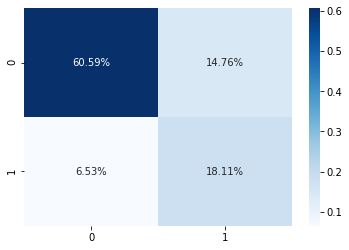

In [39]:
#make a visualization of confusion matrix

import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')



Lower left quadrant looks good - percentage of false negatives is quite low at 6.53%

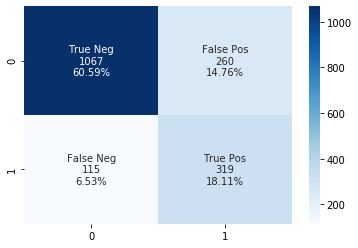

In [40]:
#Updating graph to show labels

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]


group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


Let's take a look at the feature importance of our new model.

In [41]:
#Setting column names and calling featuring importances

col_names = ['gender', 'SeniorCitizen','Partner','Dependents', 'tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
top_feats = rf.feature_importances_
top_feats


feat_names=list(col_names)
# feat_names

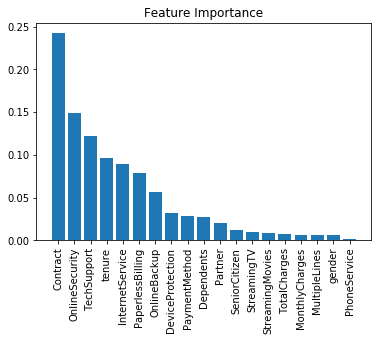

In [42]:
#writing the code for feature importance graph

# Sort feature importances in descending order
indices = np.argsort(top_feats)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

# Visualizing our model

In [43]:
#install graphing package 

pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [44]:
#install package to assist with visualization

pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [45]:
#install package to assist with visualization


pip install six

Note: you may need to restart the kernel to use updated packages.


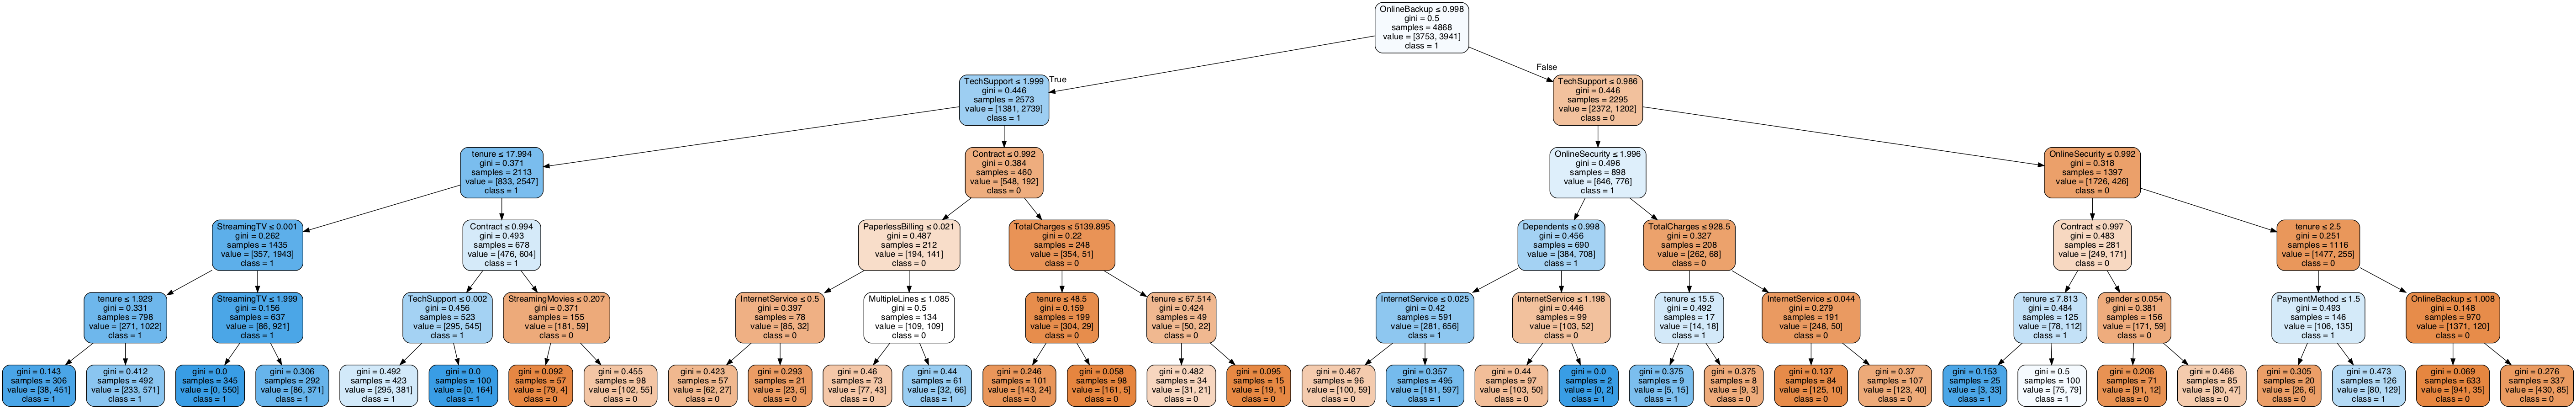

In [46]:
from sklearn import tree

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5)

smotemodel = rf.fit(X_train_resampled, y_train_resampled)

estimator = smotemodel.estimators_[4]

col_names = ['gender', 'SeniorCitizen','Partner','Dependents', 'tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('title.png')
Image(graph.create_png())

# Adding new features to our model

Now that we've optimized our baseline model, let's add a couple of custom features and see how that impacts our model.

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505.0,2505.0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1466.0,1466.0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,157.0,157.0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1400.0,1400.0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,925.0,925.0,1


In [48]:
#Adding a feature for number of services, and a feature for whether or not the customer has changed plans 
df2 = df
pd.options.display.float_format = '{:,.2f}'.format

df2['numberofservices'] = df2['PhoneService'] + df2['InternetService'] + df2['OnlineSecurity'] + df2['OnlineBackup'] + df2['DeviceProtection'] + df2['TechSupport'] + df2['StreamingTV'] + df2['StreamingMovies']
df2['monthlyxtenure'] = df2['MonthlyCharges'] * df2['tenure']
df2['changedplans'] = df2['monthlyxtenure'] == df2['TotalCharges']

df2.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numberofservices,monthlyxtenure,changedplans
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,"2,505.00","2,505.00",0,2,"2,505.00",True
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,"1,466.00","1,466.00",0,5,"49,844.00",False
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,157.00,157.00,1,5,314.00,False
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,"1,400.00","1,400.00",0,6,"63,000.00",False
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,925.00,925.00,1,2,"1,850.00",False


Now we will repeat the same process of using SMOTE and creating a random forest model.

In [49]:
X = df2.drop('Churn',axis=1).values
y = df2['Churn'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
from imblearn.over_sampling import SMOTE
print('Original class distribution: \n')
#print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, Y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 


Original class distribution: 

-----------------------------------------
Synthetic sample class distribution: 

1    3589
0    3589
dtype: int64


In [51]:
rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5)

smotemodel = rf.fit(X_train_resampled, y_train_resampled)
print(smotemodel)

print("Accuracy on training set: {:.3f}".format(smotemodel.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(smotemodel.score(X_test, Y_test)))


rf_pred = smotemodel.predict(X_test) #predictions 
score = f1_score(rf_pred, Y_test) # F1 score 
rf_acc = accuracy_score(rf_pred, Y_test) #Accuracy 

rf_eval = ['smotemodel', score, rf_acc]
models = pd.DataFrame([rf_eval])

print('-'*40)
print('Accuracy Score:')
print(accuracy_score(Y_test, rf_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(Y_test, rf_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(Y_test, rf_pred))

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=50)
Accuracy on training set: 0.779
Accuracy on test set: 0.777
----------------------------------------
Accuracy Score:
0.7766209181258874
----------------------------------------
Confusion Matrix:
[[1238  347]
 [ 125  403]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1585
           1       0.54      0.76      0.63       528

    accuracy                           0.78      2113
   macro avg       0.72      0.77      0.74      2113
weighted avg       0.82      0.78      0.79      2113



Accuracy only slightly went down from .78, but our recall is now up to .76, from .74 earlier.

In [52]:
#Running the same process to look at feature importance for updated model

col_names = ['gender', 'SeniorCitizen','Partner','Dependents', 'tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','numberofservices','monthlyxtenure','changedplans']
top_feats = smotemodel.feature_importances_
top_feats

feat_names=list(col_names)
feat_names


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'numberofservices',
 'monthlyxtenure',
 'changedplans']

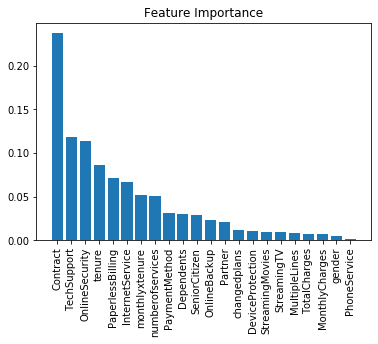

In [53]:
#writing the code for feature importance graph

# Sort feature importances in descending order
indices = np.argsort(top_feats)[::-1]

#[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), top_feats[indices])

# plt.bar(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()




Monthly x tenure feature, is actually much more important than total charges, and changed plans is also more important. In the future, take a look at upgraded vs downgraded plans. 

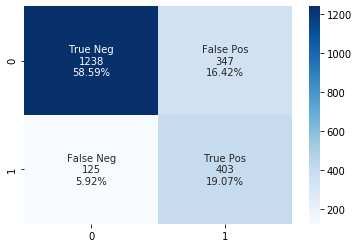

In [54]:
#running another confusion matrix

cf_matrix = confusion_matrix(Y_test, rf_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]


group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

We can see that our false negatives have decreased to 5.92%, from 6.53%, as a result of adding our new features.

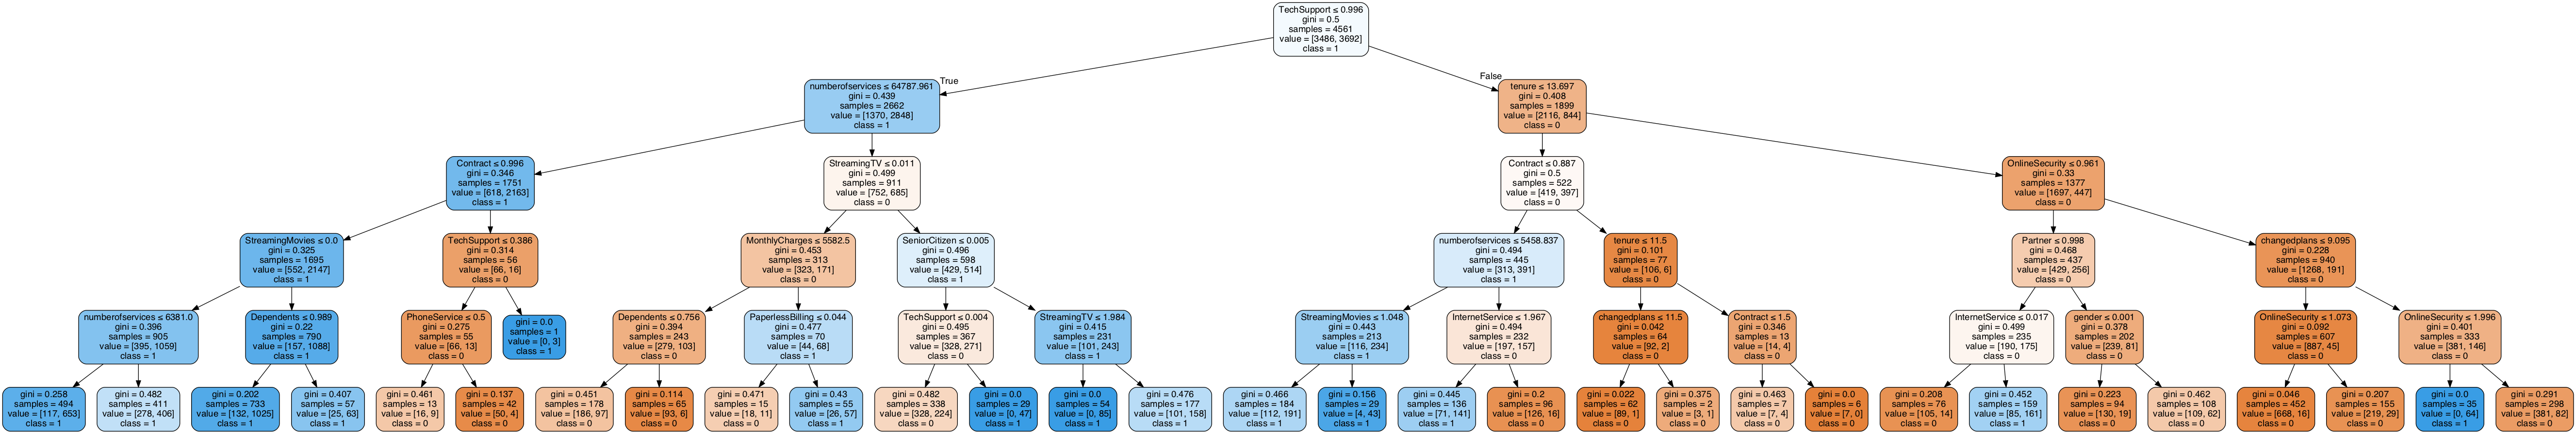

In [55]:
#Printing updated model visualization

from sklearn import tree

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

rf = RandomForestClassifier(n_estimators=200,random_state=50,max_depth=5)

smotemodel = rf.fit(X_train_resampled, y_train_resampled)

estimator = smotemodel.estimators_[3]

col_names = ['gender', 'SeniorCitizen','Partner','Dependents', 'tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','changedplans','numberofservices','monthlyxtenure']
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('title.png')
Image(graph.create_png())

# Conclusions

1) Those who are not subscribed to tech support or online security, are more likely to churn. These are two of the most paramount factors and are highly recommended for your company to focus marketing efforts on. 

2) Number of services often has significantly more impact on churn than whether or not a customer has a specific service, namely for movie and tv streaming, and phone service itself. The higher the number, typically the less likely a customer will be to churn. Upselling and providing marketing deals for existing customers with relatively smaller number of services used, will be worth investigating.

3) Whether a customer has changed a plan or not, has only a small impact. Monthly and lifetime charges had virtually no impact - so it may not be worth it to focus churn-avoidance efforts on those who have small bills.

4) Those who have month-to-month contracts are significantly more likely to churn vs yearly contract customers, unless they are subscribed to tech support. Consider offering special deals for those who sign up for a yearly contract.

5) Those with tenure of less than 6 years are significantly more likely to churn. Consider focusing your churn-avoidance efforts on customers who have recently signed up.

# Future Work

1) Investigating the difference between upgrading vs downgrading one's membership plan

2) Test specifically for paperless billing vs non paperless

3) Loyalty programs

4) Type of carrier used